# Линейная регрессия

### Задание
1. Загрузите данные из файла reglab1.txt. Постройте по набору данных регрессии, используя модели с различными зависимыми переменными. Выберите наиболее подходящую модель.
2. Реализуйте следующий алгоритм для уменьшения количества признаков, используемых для построения регрессии: для каждого  выбрать подмножество признаков мощности , минимизирующее остаточную сумму квадратов RSS. Используя полученный алгоритм, выберите оптимальное подмножество признаков для данных из файла reglab.txt. Объясните свой выбор.
3. Загрузите данные из файла cygage.txt. Постройте регрессию, выражающую зависимость возраста исследуемых отложений от глубины залегания, используя веса наблюдений. Оцените качество построенной модели.
4. Загрузите данные из файла longley.csv. Данные состоят из 7 экономических переменных, наблюдаемых с 1947 по 1962 годы (n=16). Исключите переменную Population. Разделите данные на тестовую и обучающую выборки равных размеров случайным образом. Постройте линейную регрессию по признаку Employed.Постройте гребневую регрессию для значений l=10^(-3+0.2i), i = 0,...,25. Подсчитайте ошибку на тестовой и обучающей выборке для линейной регрессии и гребневой регрессии на данных значениях λ, постройте графики. Объясните полученные результаты.
5. Загрузите данные из файла eustock.csv. Данные содержат ежедневные котировки на момент закрытия фондовых бирж: Germany DAX (Ibis), Switzerland SMI, France CAC, и UK FTSE. Постройте на одном графике все кривые изменения котировок во времени. Постройте линейную регрессию для каждой модели в отдельности и для всех моделей вместе. Оцените, какая из бирж имеет наибольшую динамику.
6. Загрузите данные из файла JohnsonJohnson.csv. Данные содержат поквартальную прибыль компании Johnson & Johnson с 1960 по 1980 гг. Постройте на одном графике все кривые изменения прибыли во времени. Постройте линейную регрессию для каждого квартала в отдельности и для всех кварталов вместе. Оцените, в каком квартале компания имеет наибольшую и наименьшую динамику доходности. Сделайте прогноз по прибыли в 2016 году во всех кварталах и в среднем по году.
7. Загрузите данные из файла cars.csv. Данные содержат зависимости тормозного пути автомобиля (футы) от его скорости (мили в час). Данные получены в 1920 г. Постройте регрессионную модель и оцените длину тормозного пути при скорости 40 миль в час. 
8. Загрузите данные из файла svmdata6.txt. Постройте регрессионный алгоритм метода опорных векторов (sklearn.svm.SVR) с параметром C = 1, используя ядро "rbf". Отобразите на графике зависимость среднеквадратичной ошибки на обучающей выборке от значения параметра ε. Прокомментируйте полученный результат
9. Загрузите набор данных из файла nsw74psid1.csv. Постройте регрессионное дерево (sklearn.tree.DecisionTreeRegressor) для признака re78. Постройте линейную регрессионную модель и SVM-регрессию для этого набора данных. Сравните качество построенных моделей, выберите оптимальную модель и объясните свой выбор. 


In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from pandas import read_csv
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import BayesianRidge, LinearRegression, Ridge
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestRegressor

# Задание 1
 - Загрузите данные из файла reglab1.txt. Постройте по набору данных регрессии, используя модели с различными зависимыми переменными. Выберите наиболее подходящую модель.

In [157]:
data = read_csv('reglab1.txt', delimiter='\t').to_numpy()

In [158]:
def generate_dataset(var=-1):
    if var < 0:
        var = len(data[0]) + var
    Y = data[:, var]
    X = np.delete(data, [var], axis=1)
    return train_test_split(X, Y, test_size=0.3)

In [159]:
def get_score_for_classifier(clf, var=-1):
    X_train, X_test, y_train, y_test = generate_dataset(var)

    clf.fit(x_train, y_train)
  
    return clf.score(X_test, y_test)

LinearRegression 0 0.9676866235797889 Z- независимая переменная
LinearRegression 1 0.9098359155580877 X- независимая переменная
LinearRegression 2 0.9410516665327747 Z- независимая переменная
LinearRegression 0 0.9653562536062481 Z- независимая переменная
LinearRegression 1 0.9153673831238504 X- независимая переменная
LinearRegression 2 0.9345015624495833 Z- независимая переменная
LinearRegression 0 0.9744687108897848 Z- независимая переменная
LinearRegression 1 0.9032542959039066 X- независимая переменная
LinearRegression 2 0.9447632756766106 Z- независимая переменная
LinearRegression 0 0.9564094535541864 Z- независимая переменная
LinearRegression 1 0.9328289881553312 X- независимая переменная
LinearRegression 2 0.9402551509382044 Z- независимая переменная
LinearRegression 0 0.9627995292084464 Z- независимая переменная
LinearRegression 1 0.9295678180543171 X- независимая переменная
LinearRegression 2 0.9494717648405396 Z- независимая переменная
LinearRegression 0 0.9743281575249736 Z-

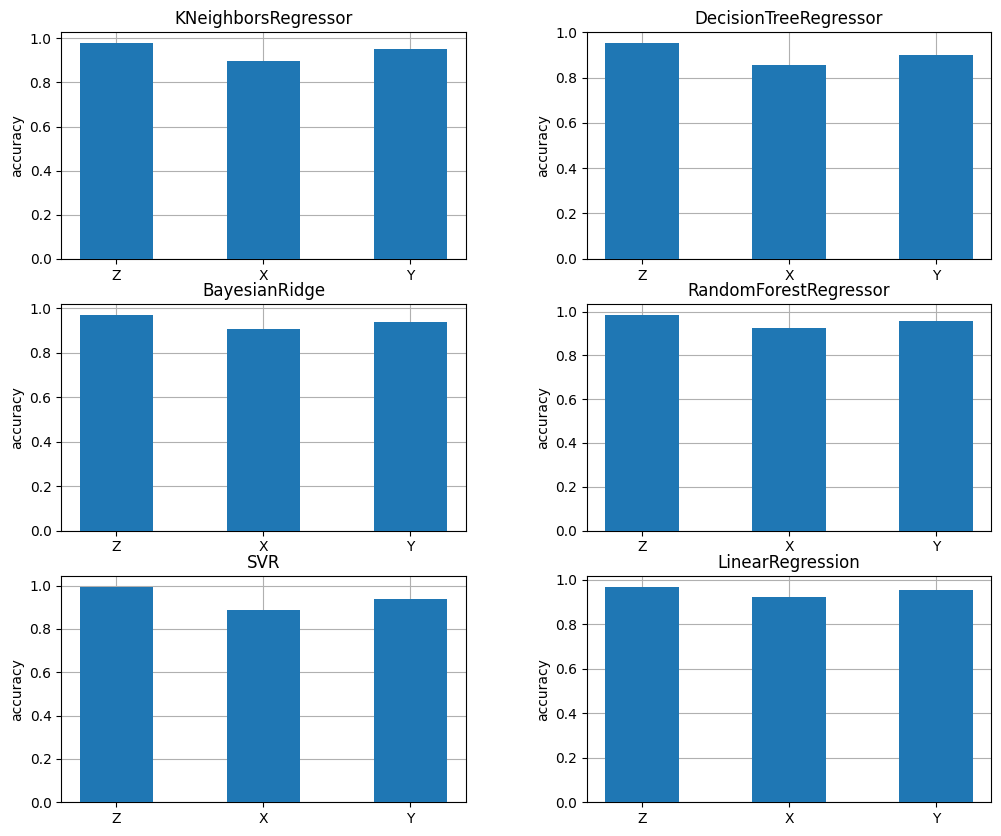

In [176]:
regressions = [
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    BayesianRidge(),
    RandomForestRegressor(n_estimators=100),
    SVR(),
    LinearRegression()
]

vars = [0, 1, 2]
vars_names = ['Z','X', 'Z']

fig, sub = plt.subplots(3, 2, figsize=(12, 10))
plt.subplots_adjust(wspace=.3, hspace=.2)

for reg, ax in zip(regressions, sub.flatten()):
    results = []
    for v in vars:
        print(clf.__class__.__name__,v, get_results_for_classifier(clf, v), vars_names[v] + '- независимая переменная')
        results.append(get_results_for_classifier(reg, v))
    ax.bar(vars, results, zorder=3, width=0.5)
    ax.set_xticks(vars)
    ax.set_yticks(np.arange(1.19, step=0.2))
    ax.set_xticklabels(('Z', 'X', 'Y'))
    ax.set_title(reg.__class__.__name__)
    ax.set_ylabel('accuracy')
    ax.grid(True, zorder=0)

plt.show()

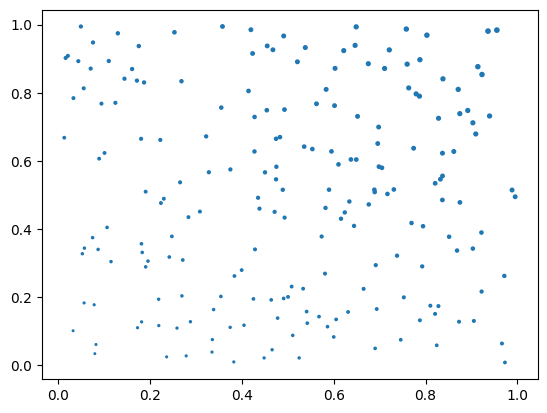

In [169]:
plt.scatter(data[:, 1], data[:, 2],data[:, 0])

# Задание 2
 - Реализуйте следующий алгоритм для уменьшения количества признаков, используемых для построения регрессии: для каждого выбрать подмножество признаков мощности , минимизирующее остаточную сумму квадратов RSS. Используя полученный алгоритм, выберите оптимальное подмножество признаков для данных из файла reglab.txt. Объясните свой выбор.

In [151]:
from itertools import product
from math import factorial

In [152]:
def RSS(y_true, y_pred):
    return np.sum(np.square(y_true-y_pred))

In [153]:
data = read_csv('reglab.txt', delimiter='\t').to_numpy()

Y = data[:, 0]
X = np.delete(data, [0], axis=1)

In [191]:
t = list(np.arange(len(X[0, :])))
def subsets( S ):
    sets = []
    len_S = len( S )
    for i in range( 1 << len_S ):
        subset = [ S[ bit ] for bit in range( len_S ) if i & ( 1 << bit ) ]
        sets.append( subset )
    return sets



cols_set = subsets(t)[1:]
cols_set

[[0],
 [1],
 [0, 1],
 [2],
 [0, 2],
 [1, 2],
 [0, 1, 2],
 [3],
 [0, 3],
 [1, 3],
 [0, 1, 3],
 [2, 3],
 [0, 2, 3],
 [1, 2, 3],
 [0, 1, 2, 3]]

In [194]:
reg = LinearRegression()

res = []

labels = np.array(('X1', 'X2', 'X3', 'X4'))

for col in cols_set:
    cur_X = X[:, col]
    reg.fit(cur_X, Y)
    y_pred = reg.predict(cur_X)
    res.append((col, RSS(Y, y_pred)))

# res = sorted(res, key=lambda res: res[1])

for i, r in zip(range(len(res)), res):
    print('Features{} RSS = {}'.format(labels[r[0]], r[1]))

Features set ['X1'] RSS = 157.2197758284528
Features set ['X2'] RSS = 268.2457708399214
Features set ['X1' 'X2'] RSS = 0.537961710578255
Features set ['X3'] RSS = 393.49046860549686
Features set ['X1' 'X3'] RSS = 156.35406574563234
Features set ['X2' 'X3'] RSS = 267.79545424300983
Features set ['X1' 'X2' 'X3'] RSS = 0.33226621497375647
Features set ['X4'] RSS = 394.5904974603926
Features set ['X1' 'X4'] RSS = 157.21926831527958
Features set ['X2' 'X4'] RSS = 267.8061361302551
Features set ['X1' 'X2' 'X4'] RSS = 0.3619682482772945
Features set ['X3' 'X4'] RSS = 393.458728053751
Features set ['X1' 'X3' 'X4'] RSS = 156.3483397038426
Features set ['X2' 'X3' 'X4'] RSS = 267.4415471943948
Features set ['X1' 'X2' 'X3' 'X4'] RSS = 0.19286354148384216


# Задание 3
- Загрузите данные из файла cygage.txt. Постройте регрессию, выражающую зависимость возраста исследуемых отложений от глубины залегания, используя веса наблюдений. Оцените качество построенной модели.

In [16]:
data = read_csv('cygage.txt', delimiter='\t').to_numpy()
data
Y = data[:, 0]
Y = Y.astype('int')
X = np.delete(data, [0], axis=1)
X

array([[0.00000000e+00, 1.00000000e+00],
       [7.70000000e+01, 1.00000001e-01],
       [9.00000000e+01, 1.00000001e-01],
       [1.07000000e+02, 1.00000001e-01],
       [1.68000000e+02, 1.00000001e-01],
       [2.17000000e+02, 1.00000001e-01],
       [2.82000000e+02, 1.00000000e+00],
       [3.79000000e+02, 5.00000000e-01],
       [4.40000000e+02, 5.00000000e-01],
       [5.14000000e+02, 5.00000000e-01],
       [6.25000000e+02, 5.00000000e-01],
       [6.96000000e+02, 1.00000001e-01]])

In [271]:
# KNeighborsRegressor(),
#     DecisionTreeRegressor(),
#     BayesianRidge(),
#     RandomForestRegressor(n_estimators=100),
#     SVR(),
#     LinearRegression()

reg = BayesianRidge()
accs = []
# for i in range(1000):
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
reg.fit(x_train, y_train)
accs.append(reg.score(x_test, y_test))
np.mean(accs) * 100

99.92990762040347

# Задание 4
- Загрузите данные из файла longley.csv. Данные состоят из 7 экономических переменных, наблюдаемых с 1947 по 1962 годы (n=16). Исключите переменную Population. Разделите данные на тестовую и обучающую выборки равных размеров случайным образом. Постройте линейную регрессию по признаку Employed.Постройте гребневую регрессию для значений l=10^(-3+0.2i), i = 0,...,25. Подсчитайте ошибку на тестовой и обучающей выборке для линейной регрессии и гребневой регрессии на данных значениях λ, постройте графики. Объясните полученные результаты.

In [78]:
data = read_csv('longley.csv', sep=',').to_numpy()
data
Y = data[:, -1]
# удаляем признак Population он 4 по номеру и признак, который мы выьираем зависимым (Employed)
X = np.delete(data, [-1, 4], axis=1)
X, Y

(array([[  83.   ,  234.289,  235.6  ,  159.   , 1947.   ],
        [  88.5  ,  259.426,  232.5  ,  145.6  , 1948.   ],
        [  88.2  ,  258.054,  368.2  ,  161.6  , 1949.   ],
        [  89.5  ,  284.599,  335.1  ,  165.   , 1950.   ],
        [  96.2  ,  328.975,  209.9  ,  309.9  , 1951.   ],
        [  98.1  ,  346.999,  193.2  ,  359.4  , 1952.   ],
        [  99.   ,  365.385,  187.   ,  354.7  , 1953.   ],
        [ 100.   ,  363.112,  357.8  ,  335.   , 1954.   ],
        [ 101.2  ,  397.469,  290.4  ,  304.8  , 1955.   ],
        [ 104.6  ,  419.18 ,  282.2  ,  285.7  , 1956.   ],
        [ 108.4  ,  442.769,  293.6  ,  279.8  , 1957.   ],
        [ 110.8  ,  444.546,  468.1  ,  263.7  , 1958.   ],
        [ 112.6  ,  482.704,  381.3  ,  255.2  , 1959.   ],
        [ 114.2  ,  502.601,  393.1  ,  251.4  , 1960.   ],
        [ 115.7  ,  518.173,  480.6  ,  257.2  , 1961.   ],
        [ 116.9  ,  554.894,  400.7  ,  282.7  , 1962.   ]]),
 array([60.323, 61.122, 60.171, 61.187

 - Разделите данные на тестовую и обучающую выборки равных размеров случайным образом. Постройте линейную регрессию по признаку Employed.

In [111]:
reg = LinearRegression()
accs = []

for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
    reg.fit(x_train, y_train)
    accs.append(reg.score(x_test, y_test))
np.mean(accs)

0.9451494592925467

 - Постройте гребневую регрессию для значений l=10^(-3+0.2i), i = 0,...,25. Подсчитайте ошибку на тестовой и обучающей выборке для линейной регрессии и гребневой регрессии на данных значениях λ, постройте графики. Объясните полученные результаты.

  - l, которые мы генерируем и есть alpha алгоритма Ridge
      - Коэффициент alpha в гребневой регрессии (Ridge Regression) является гиперпараметром, который контролирует величину штрафа на коэффициенты регрессии в целевой функции.

     - Чем больше значение alpha, тем сильнее штраф на большие значения коэффициентов регрессии. Это позволяет уменьшить значения коэффициентов, что уменьшает переобучение модели и делает ее более устойчивой к шуму в данных. 

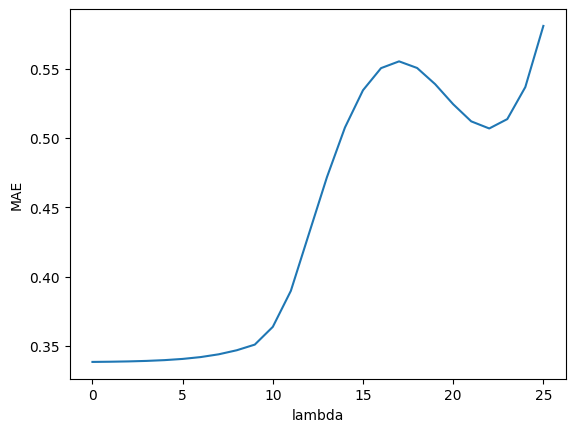

In [84]:
def lam(i):
    return 10**(-3+0.2*i)

ridge = Ridge()

lamdas = [lam(i) for i in range(26)]

res = []

for l in lamdas:
    ridge.alpha = l
    ridge.fit(x_train, y_train)
    res.append(mean_absolute_error(y_test, ridge.predict(x_test)))

plt.plot(range(26), res)

# plt.xlabel('i')
plt.xlabel('lambda')
plt.ylabel('MAE')

plt.show()



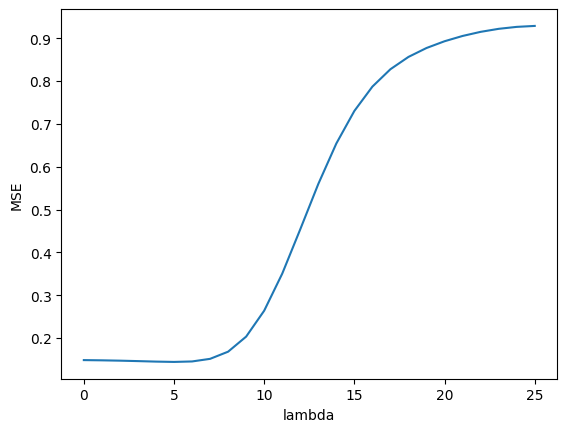

0.9136507577038921

In [114]:
def lam(i):
    return 10**(-3+0.2*i)

ridge = Ridge()

lamdas = [lam(i) for i in range(26)]

res = []

for l in lamdas:
    ridge.alpha = l
    ridge.fit(x_train, y_train)
    res.append(mean_squared_error(y_test, ridge.predict(x_test)))

plt.plot(range(26), res)

# plt.xlabel('i')
plt.xlabel('lambda')
plt.ylabel('MSE')

plt.show()


ridge_reg = Ridge()

accs = []

for i in range(1000):
    ridge_reg.alpha = 5
    x_train_ridge, x_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X, Y, test_size=0.5)
    ridge_reg.fit(x_train_ridge, y_train_ridge)
    accs.append(ridge_reg.score(x_test_ridge, y_test_ridge))

np.mean(accs)


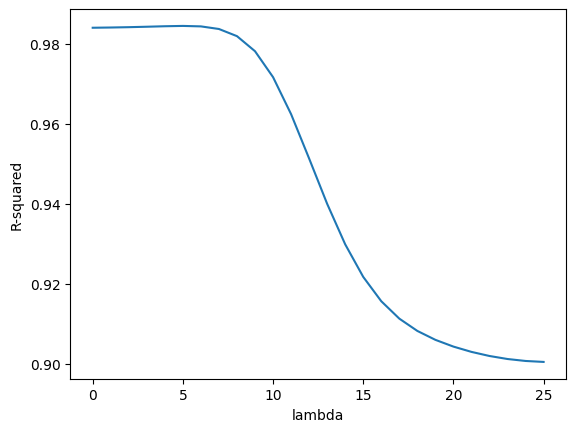

In [115]:
from sklearn.metrics import r2_score

def lam(i):
    return 10**(-3+0.2*i)

ridge = Ridge()

lamdas = [lam(i) for i in range(26)]

res = []

for l in lamdas:
    ridge.alpha = l
    ridge.fit(x_train, y_train)
    res.append(r2_score(y_test, ridge.predict(x_test)))

plt.plot(range(26), res)

# plt.xlabel('i')
plt.xlabel('lambda')
plt.ylabel('R-squared')

plt.show()



# Задание 5
- Загрузите данные из файла eustock.csv. Данные содержат ежедневные котировки на момент закрытия фондовых бирж: Germany DAX (Ibis), Switzerland SMI, France CAC, и UK FTSE. Постройте на одном графике все кривые изменения котировок во времени. Постройте линейную регрессию для каждой модели в отдельности и для всех моделей вместе. Оцените, какая из бирж имеет наибольшую динамику.

In [120]:
data = read_csv('eustock.csv', delimiter=',').to_numpy()
titles = ['DAX', 'SMI', 'CAC', 'FTSE']
columns = []
for i in range(len(data[0])):
    columns.append(data[:, i])
columns = np.array(columns)

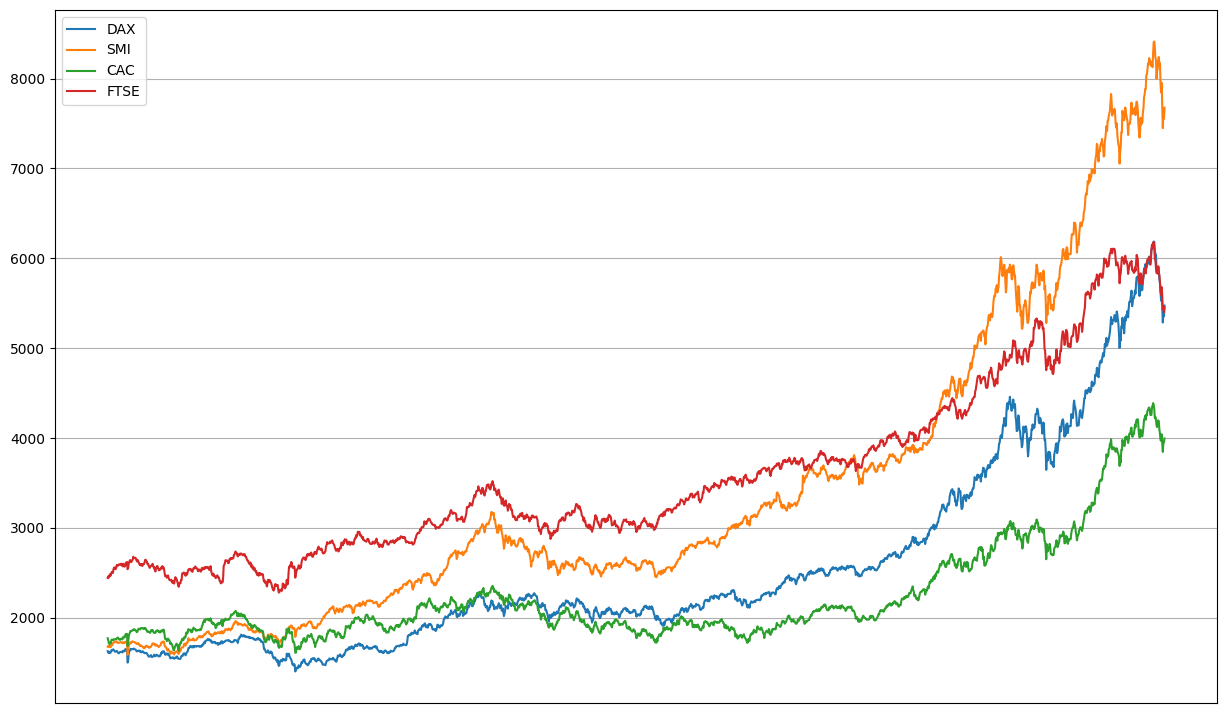

In [131]:
xticks = [i for i in range(1, len(columns[0]) + 1)]

reals = []

plt.figure(figsize=(15, 9))

for column in columns:
    real, = plt.plot(xticks, column)

    reals.append(real)

plt.legend(reals, titles)

plt.grid(True)

plt.xticks(())

plt.show()

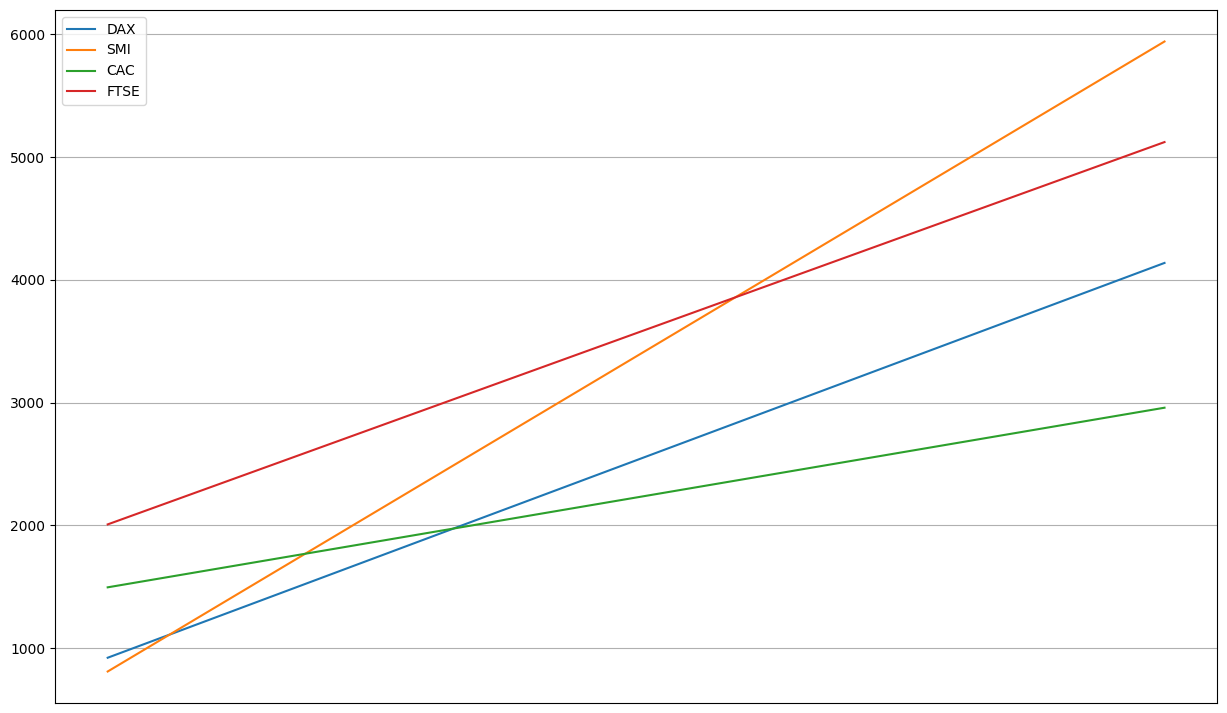

In [132]:
xticks = np.arange(1, len(columns[0]) + 1)

plt.figure(figsize=(15, 9))

for column, title in zip(columns, titles):
    clf = LinearRegression()
    column = column.reshape(-1)
    xticks_reshaped = xticks.reshape(-1, 1)
    clf.fit(xticks_reshaped, column)
    pred = clf.predict(xticks_reshaped)
    plt.plot(xticks_reshaped, pred)

plt.legend(titles)

plt.grid(True)

plt.xticks(())

plt.show()

# Задание 6
- Загрузите данные из файла JohnsonJohnson.csv. Данные содержат поквартальную прибыль компании Johnson & Johnson с 1960 по 1980 гг. 
- Постройте на одном графике все кривые изменения прибыли во времени. Постройте линейную регрессию для каждого квартала в отдельности и для всех кварталов вместе.
- Оцените, в каком квартале компания имеет наибольшую и наименьшую динамику доходности.
- Сделайте прогноз по прибыли в 2016 году во всех кварталах и в среднем по году.

In [157]:
data = read_csv('JohnsonJohnson.csv', sep=',').to_numpy()

qs = [[] for _ in range(4)]

for i in data:
    # Q number , 
    qnum = int(i[0][-1])
    qs[qnum - 1].append(i)

for i in range(len(qs)):
    # собираем в отдельные колонки по кварталам значения прибыли 
    qs[i] = np.array(qs[i])[:, 1].reshape(-1, 1)

qs = np.array(qs)
x_axis = range(len(q))
years = np.arange(1960, 1981)

all_years = np.sum(np.concatenate(qs, axis=1), axis=1).reshape(-1, 1)

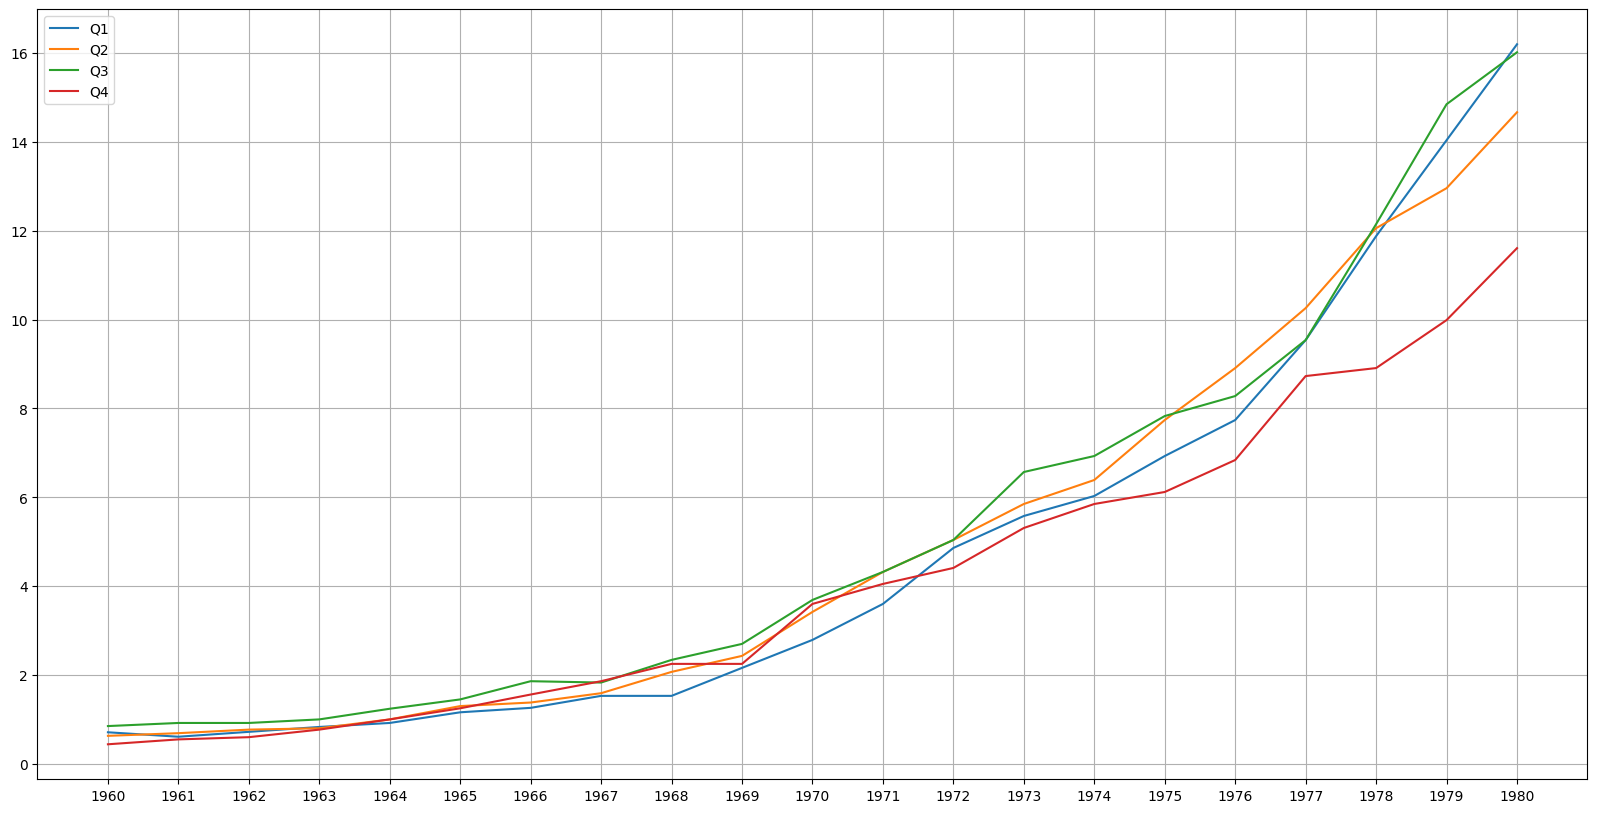

In [196]:
plt.figure(figsize=(20, 10))

for q in qs:
    plt.plot(x_axis, q)

# plt.plot(x_axis, all_years)

plt.xticks(x_axis, years)

plt.legend(('Q1', 'Q2', 'Q3', 'Q4', 'Year'))

plt.grid(True)

plt.show()

In [171]:
all_years = np.sum(np.concatenate(qs, axis=1), axis=1).reshape(-1, 1)

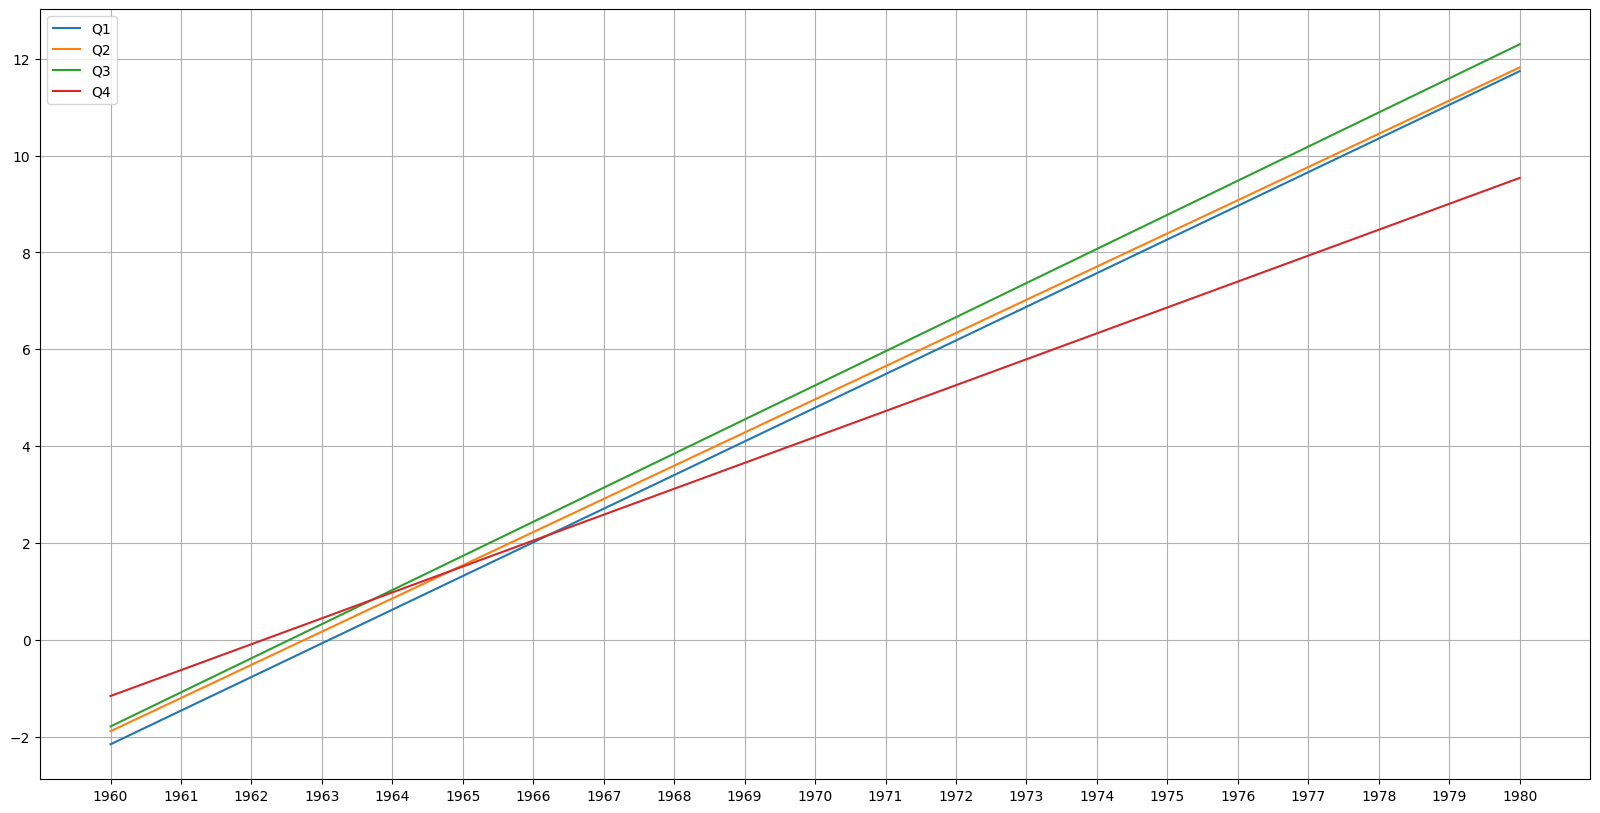

Q1	36.75963636363622
Q2	36.48945454545469
Q3	37.653939393939254
Q4	28.79391341991345
[139.69694372]


In [202]:
plt.figure(figsize=(20, 10))

preds_2016 = []

lr = LinearRegression()
yreshaped = years.reshape(-1, 1)

for q in qs:
    lr.fit(yreshaped, q.reshape(-1))
    pred = lr.predict(yreshaped)
    plt.plot(years, pred)
    preds_2016.append(lr.predict([[2016]])[0])


plt.xticks(years, [str(i) for i in years])

plt.legend(('Q1', 'Q2', 'Q3', 'Q4', 'all_qs'))
plt.grid(True)

plt.show()


for p, i in zip(preds_2016, range(1, 5)):
    print('Q' + str(i), p, sep='\t')

lr.fit(yreshaped, all_years)
# all_qs_preds = lr.predict(yreshaped)
# plt.plot(years, all_qs_preds)
print(lr.predict([[2016]])[0])




# Задание 7 
- Загрузите данные из файла cars.csv. Данные содержат зависимости тормозного пути автомобиля (футы) от его скорости (мили в час). Данные получены в 1920 г. Постройте регрессионную модель и оцените длину тормозного пути при скорости 40 миль в час.

In [208]:
data = read_csv('cars.csv', delimiter=',').to_numpy()


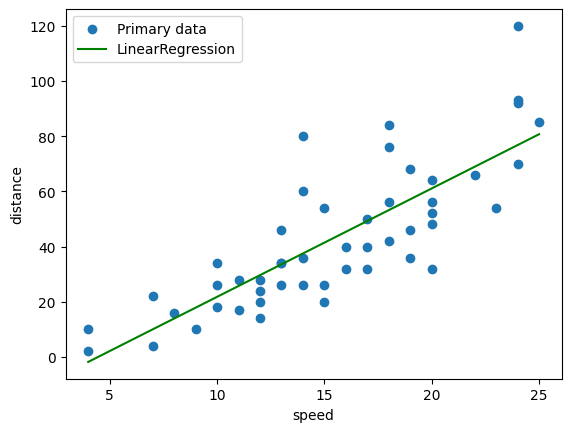

In [217]:
speed = data[:, 0]
dist = data[:, 1]
speed = X.reshape(-1, 1)

plt.scatter(speed, dist)

lr = LinearRegression()
lr.fit(speed, dist)
pred = lr.predict(speed)

plt.plot(speed, pred, color='green')
plt.xlabel('speed')
plt.ylabel('distance')
plt.legend(('Primary data', 'LinearRegression'))

plt.show()

In [216]:
print(lr.predict([[40], [35], [45]]))


[139.71725547 120.05521168 159.37929927]


# Задание 8
- Загрузите данные из файла svmdata6.txt. Постройте регрессионный алгоритм метода опорных векторов (sklearn.svm.SVR) с параметром C = 1, используя ядро "rbf". Отобразите на графике зависимость среднеквадратичной ошибки на обучающей выборке от значения параметра ε. Прокомментируйте полученный результат


In [227]:
data = read_csv('svmdata6.txt', delimiter='\t').to_numpy()

X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]

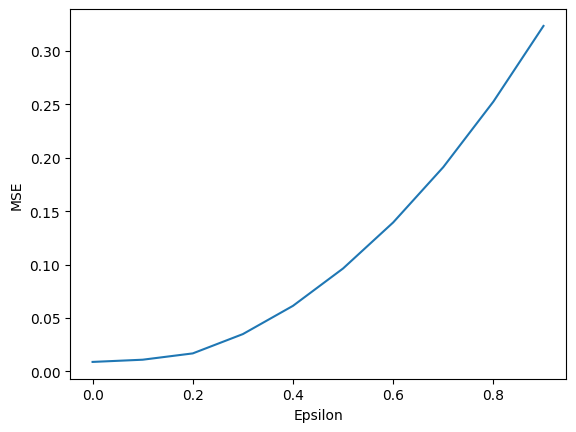

In [232]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
svr = SVR(C=1, kernel='rbf')

epsilons = np.arange(0, 1, 0.1)

errors = []

for e in epsilons:
    svr.epsilon = e
    svr.fit(x_train, y_train)

    err = mean_squared_error(y_test, svr.predict(x_test))

    errors.append(err)

plt.figure()

plt.plot(epsilons, errors)

plt.xlabel('Epsilon')

plt.ylabel('MSE')

plt.show()

# Задание 9
- Загрузите набор данных из файла nsw74psid1.csv. Постройте регрессионное дерево (sklearn.tree.DecisionTreeRegressor) для признака re78. Постройте линейную регрессионную модель и SVM-регрессию для этого набора данных. Сравните качество построенных моделей, выберите оптимальную модель и объясните свой выбор.

In [3]:
data = read_csv('nsw74psid1.csv', delimiter=',').to_numpy()
Y = data[:, -1]
X = np.delete(data, -1, axis=1)
X

array([[0.000000e+00, 4.700000e+01, 1.200000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 5.000000e+01, 1.200000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 4.400000e+01, 1.200000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.000000e+00, 3.500000e+01, 9.000000e+00, ..., 1.000000e+00,
        1.360243e+04, 1.383064e+04],
       [1.000000e+00, 3.500000e+01, 8.000000e+00, ..., 1.000000e+00,
        1.373207e+04, 1.797615e+04],
       [1.000000e+00, 3.300000e+01, 1.100000e+01, ..., 1.000000e+00,
        1.466071e+04, 2.514224e+04]])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

from sklearn.tree import plot_tree


regressions = [
               DecisionTreeRegressor(max_depth=5),
               LinearRegression(),
               SVR()
]

fig = plt.figure(figsize=(150, 60))


for reg in regressions:
    reg.fit(x_train, y_train)
    print('{}: {}%'.format(reg.__class__.__name__, reg.score(x_test, y_test) * 100))

plot_tree(regressions[0], filled=True)
plt.show()

DecisionTreeRegressor: 47.640599325147804%
LinearRegression: 61.36961311055944%
SVR: 2.032081092353488%


In [31]:
for i in range (2, 1000):
    tree_regr = DecisionTreeRegressor(max_depth=i)
    tree_regr.fit(x_train, y_train)
    print('depth',i,'{}: {}%'.format(tree_regr.__class__.__name__, tree_regr.score(x_test, y_test) * 100))



depth 2 DecisionTreeRegressor: 49.15214017175632%
depth 3 DecisionTreeRegressor: 53.00546630349137%
depth 4 DecisionTreeRegressor: 51.52488424047759%
depth 5 DecisionTreeRegressor: 49.654796729022465%
depth 6 DecisionTreeRegressor: 51.38510447956236%
depth 7 DecisionTreeRegressor: 44.61762383556134%
depth 8 DecisionTreeRegressor: 43.57791089803109%
depth 9 DecisionTreeRegressor: 28.87388903918543%
depth 10 DecisionTreeRegressor: 30.776684401064923%
depth 11 DecisionTreeRegressor: 31.024584236955743%
depth 12 DecisionTreeRegressor: 27.274379921827286%
depth 13 DecisionTreeRegressor: 30.788295788652974%
depth 14 DecisionTreeRegressor: 20.98766273739454%
depth 15 DecisionTreeRegressor: 15.195298995647889%
depth 16 DecisionTreeRegressor: 17.444213647031305%
depth 17 DecisionTreeRegressor: 15.711947969857842%
depth 18 DecisionTreeRegressor: 14.74622544162708%
depth 19 DecisionTreeRegressor: 17.31231266736819%
depth 20 DecisionTreeRegressor: 16.69750222926083%
depth 21 DecisionTreeRegressor:

depth 165 DecisionTreeRegressor: 25.668439716851776%
depth 166 DecisionTreeRegressor: 18.114850111697358%
depth 167 DecisionTreeRegressor: 12.947936946957562%
depth 168 DecisionTreeRegressor: 21.716200744395053%
depth 169 DecisionTreeRegressor: 19.706001293979934%
depth 170 DecisionTreeRegressor: 21.506374472832412%
depth 171 DecisionTreeRegressor: 24.536410309332844%
depth 172 DecisionTreeRegressor: 16.49331932281306%
depth 173 DecisionTreeRegressor: 13.590236214076812%
depth 174 DecisionTreeRegressor: 15.081733429110056%
depth 175 DecisionTreeRegressor: 18.197032849304286%
depth 176 DecisionTreeRegressor: 15.508162083752186%
depth 177 DecisionTreeRegressor: 13.900519828496915%
depth 178 DecisionTreeRegressor: 20.47545180096815%
depth 179 DecisionTreeRegressor: 12.219518817992947%
depth 180 DecisionTreeRegressor: 20.822291700314256%
depth 181 DecisionTreeRegressor: 17.193535387244673%
depth 182 DecisionTreeRegressor: 18.527633990654124%
depth 183 DecisionTreeRegressor: 17.936228115033

depth 325 DecisionTreeRegressor: 17.86795392287249%
depth 326 DecisionTreeRegressor: 23.75475496000852%
depth 327 DecisionTreeRegressor: 23.73041314329113%
depth 328 DecisionTreeRegressor: 19.049688493914687%
depth 329 DecisionTreeRegressor: 17.37832013271565%
depth 330 DecisionTreeRegressor: 23.465332188335232%
depth 331 DecisionTreeRegressor: 24.08360452661572%
depth 332 DecisionTreeRegressor: 17.946318142283324%
depth 333 DecisionTreeRegressor: 16.431601225190196%
depth 334 DecisionTreeRegressor: 18.172249430865726%
depth 335 DecisionTreeRegressor: 18.60949653617432%
depth 336 DecisionTreeRegressor: 19.50050822830591%
depth 337 DecisionTreeRegressor: 26.528712147409827%
depth 338 DecisionTreeRegressor: 23.52785731897794%
depth 339 DecisionTreeRegressor: 13.299568078393143%
depth 340 DecisionTreeRegressor: 16.796111129861135%
depth 341 DecisionTreeRegressor: 16.022227115197907%
depth 342 DecisionTreeRegressor: 21.292901285993526%
depth 343 DecisionTreeRegressor: 16.5772349015638%
dep

depth 499 DecisionTreeRegressor: 21.813669890237975%
depth 500 DecisionTreeRegressor: 22.869622304078252%
depth 501 DecisionTreeRegressor: 16.984482492995923%
depth 502 DecisionTreeRegressor: 26.53273938299585%
depth 503 DecisionTreeRegressor: 19.060255958228723%
depth 504 DecisionTreeRegressor: 20.18799899462531%
depth 505 DecisionTreeRegressor: 15.373005808391015%
depth 506 DecisionTreeRegressor: 25.12028934519883%
depth 507 DecisionTreeRegressor: 21.11691725482343%
depth 508 DecisionTreeRegressor: 23.060176672501598%
depth 509 DecisionTreeRegressor: 16.84036744583387%
depth 510 DecisionTreeRegressor: 24.273787525757573%
depth 511 DecisionTreeRegressor: 22.77036195037193%
depth 512 DecisionTreeRegressor: 18.467897148795455%
depth 513 DecisionTreeRegressor: 21.46233901575163%
depth 514 DecisionTreeRegressor: 26.90397093429254%
depth 515 DecisionTreeRegressor: 16.582386678184836%
depth 516 DecisionTreeRegressor: 24.502502507676404%
depth 517 DecisionTreeRegressor: 21.44843379525859%
de

depth 659 DecisionTreeRegressor: 18.64258026325182%
depth 660 DecisionTreeRegressor: 14.743180313467796%
depth 661 DecisionTreeRegressor: 19.76975561775096%
depth 662 DecisionTreeRegressor: 20.38959288858714%
depth 663 DecisionTreeRegressor: 16.279357532946072%
depth 664 DecisionTreeRegressor: 19.659060863670565%
depth 665 DecisionTreeRegressor: 22.831605821332722%
depth 666 DecisionTreeRegressor: 19.022537594028478%
depth 667 DecisionTreeRegressor: 20.44088776053573%
depth 668 DecisionTreeRegressor: 18.412692029539368%
depth 669 DecisionTreeRegressor: 16.33822596181229%
depth 670 DecisionTreeRegressor: 27.405658315416947%
depth 671 DecisionTreeRegressor: 16.225160865251%
depth 672 DecisionTreeRegressor: 14.05122502709687%
depth 673 DecisionTreeRegressor: 21.65372019309295%
depth 674 DecisionTreeRegressor: 23.741986959291374%
depth 675 DecisionTreeRegressor: 22.558155880004314%
depth 676 DecisionTreeRegressor: 24.618815017571926%
depth 677 DecisionTreeRegressor: 17.454157956229665%
dep

depth 822 DecisionTreeRegressor: 16.698498049607302%
depth 823 DecisionTreeRegressor: 21.97128212496775%
depth 824 DecisionTreeRegressor: 17.107499135018266%
depth 825 DecisionTreeRegressor: 19.531348264163405%
depth 826 DecisionTreeRegressor: 23.726465826479593%
depth 827 DecisionTreeRegressor: 24.959050598993826%
depth 828 DecisionTreeRegressor: 11.848227223870978%
depth 829 DecisionTreeRegressor: 22.96036643844638%
depth 830 DecisionTreeRegressor: 20.829917105936445%
depth 831 DecisionTreeRegressor: 22.419356996995464%
depth 832 DecisionTreeRegressor: 20.736362759466974%
depth 833 DecisionTreeRegressor: 26.067142220178763%
depth 834 DecisionTreeRegressor: 13.531036933422191%
depth 835 DecisionTreeRegressor: 24.463713768639682%
depth 836 DecisionTreeRegressor: 13.096789822761789%
depth 837 DecisionTreeRegressor: 21.7586337686143%
depth 838 DecisionTreeRegressor: 19.585519423025666%
depth 839 DecisionTreeRegressor: 13.237512863427314%
depth 840 DecisionTreeRegressor: 21.04746973037787

depth 979 DecisionTreeRegressor: 14.45323387734938%
depth 980 DecisionTreeRegressor: 10.77916406894449%
depth 981 DecisionTreeRegressor: 22.773424329886627%
depth 982 DecisionTreeRegressor: 20.98282142004414%
depth 983 DecisionTreeRegressor: 23.450048254356926%
depth 984 DecisionTreeRegressor: 19.610574743515496%
depth 985 DecisionTreeRegressor: 18.61942126361271%
depth 986 DecisionTreeRegressor: 22.99556007347492%
depth 987 DecisionTreeRegressor: 17.70406854530573%
depth 988 DecisionTreeRegressor: 12.286308178981342%
depth 989 DecisionTreeRegressor: 21.915507689379243%
depth 990 DecisionTreeRegressor: 19.203903501003104%
depth 991 DecisionTreeRegressor: 21.420273690485516%
depth 992 DecisionTreeRegressor: 16.58893910285293%
depth 993 DecisionTreeRegressor: 26.480014655403362%
depth 994 DecisionTreeRegressor: 13.86510601118962%
depth 995 DecisionTreeRegressor: 24.23189993632637%
depth 996 DecisionTreeRegressor: 20.270923718901212%
depth 997 DecisionTreeRegressor: 18.38672330624318%
dep

In [28]:
fig = plt.figure(figsize=(20, 6))

svr = SVR(kernel='poly')
svr.fit(x_train, y_train)
print('{}:\t\t\t\t {}%\n'.format(svr.__class__.__name__, svr.score(x_test, y_test) * 100))

for reg in regressions:
    print('{}:  {}%'.format(reg.__class__.__name__, reg.score(x_test, y_test) * 100))

# plot_tree(regressions[0], filled=True)
# plt.show()

SVR:				 26.911277949504075%

DecisionTreeRegressor:  47.640599325147804%
LinearRegression:  61.36961311055944%
SVR:  2.032081092353488%


<Figure size 2000x600 with 0 Axes>